     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width     Species
0             6.4          3.2           4.5          1.5  versicolor
1             6.3          3.3           6.0          2.5   virginica
2             6.2          NaN           5.4          2.3   virginica
3             5.0          3.4           1.6          0.4      setosa
4             5.7          2.6           3.5          1.0  versicolor
..            ...          ...           ...          ...         ...
145           6.7          3.1           5.6          2.4   virginica
146           5.6          3.0           4.5          1.5  versicolor
147           5.2          3.5           1.5          0.2      setosa
148           6.4          3.1           NaN          1.8   virginica
149           5.8          2.6           4.0          NaN  versicolor

[150 rows x 5 columns]


Nmber of observations:  150
Number of observations that are complete:  94
Percentage of observations that are complete:  62.6666666666

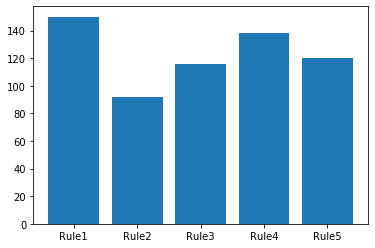

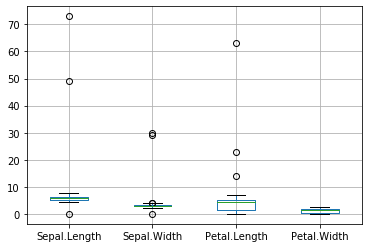

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("dirty_iris.csv")
#print(df)

f=df._get_numeric_data() 
f[f<0]=np.nan
f[f==np.inf]=np.nan
print(df)

df.dropna()
no_complete=len(df.dropna())

print("\n\nNmber of observations: ",len(df))
print("Number of observations that are complete: ",no_complete)

no_percent=(no_complete/len(df))*100
print("Percentage of observations that are complete: ",no_percent)

def species_check(f):
    species=set(["setosa","versicolor","virginica"])
    func=lambda r:r in species
    return df["Species"].apply(func)
species_check(f)

def positive(df):
    func=lambda r:r>0
    func1= lambda x: x[0] and x[1] and x[2] and x[3]
    return df.iloc[:,:-1].apply(func).apply(func1,axis=1)
positive(df)     

df.columns[:-1]

def petal_check(df):
    func = lambda x : x[0] >= 2 * x[1]
    return df[["Petal.Length","Petal.Width"]].apply(func,axis=1)
petal_check(df)

def sepal_check(df) :
    func = lambda x : x <=30
    return df["Sepal.Length"].apply(func)
sepal_check(df) 

def sepal_petal_check(df) :
    func = lambda x : x[0] > x[1]
    return df[["Sepal.Length","Petal.Length"]].apply(func,axis=1)
sepal_petal_check(df)

E={"species_check":species_check(df), "positive":positive(df), "petal_check":petal_check(df), "sepal_check":sepal_check(df), "sepal_petal_check":sepal_petal_check(df)}
temp=pd.DataFrame(E)
print(temp)

len(temp["petal_check"].loc[temp["petal_check"]==False])

xlabels=["Rule1","Rule2","Rule3","Rule4","Rule5"]
a=np.array([len(temp[i].loc[temp[i]==True]) for i in temp.columns[:]])
print("\nNumber of times each rule is satisfied (Rule1-Rule5): ")
print(a)

ylabels=a
y_positions = range(len(xlabels))

# Bar graph
plt.bar(y_positions, ylabels)
plt.xticks(y_positions, xlabels)
plt.show()

df.boxplot()